In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
from stats_tools import auto_stats
import matplotlib.pyplot as plt
from params import *
import ghibtools as gh

## PARAMS

In [3]:
ecg_interesting_metrics = ['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_pNN50', 'HRV_pNN20', 'HRV_LF', 'HRV_HF', 'HRV_LFHF']
# ecg_interesting_metrics = ['HRV_RMSSD', 'HRV_S', 'HRV_CSI', 'HRV_CVI']
ppg_interesting_metrics = ['mean amplitude', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_pNN50', 'HRV_pNN20', 'HRV_LF', 'HRV_HF', 'HRV_LFHF']
eda_interesting_metrics = ['nb_peaks', 'mean_height', 'EDA_Symp', 'EDA_SympN']

In [4]:
outcomes = {
    'eeg':['Hz_30_80', 'Hz_13_30', 'Hz_8_13', 'Hz_4_8', 'Hz_1_4'],
    'ppg': ppg_interesting_metrics,
    'ecg': ecg_interesting_metrics,
    'eda': eda_interesting_metrics
}

In [5]:
predictor = 'room'
subject = 'participant'

In [6]:
savefig = False

In [7]:
remove_participants = {
    'ecg':['P12BOULI','P25PEIAN'],
    'eeg':['P21LIYAT','P27OSTMA','P30BATDI'],
    'eda':[],
    'ppg':[]
}

## TOOLS

In [8]:
def load(dtype,remove_participants=remove_participants):
    df = pd.read_excel(f'../metrics/{dtype}_metrics.xlsx').drop(columns = 'Unnamed: 0')
    if dtype == 'eeg': # mean both sides
        df = df.set_index(['participant','room'])
        df_right = df[df['chan'] == 'EEGR']
        df_left = df[df['chan'] == 'EEGL']
        data_right = df_right.drop(columns='chan').values
        data_left = df_left.drop(columns='chan').values
        
        mean_electrodes = (data_right + data_left) / 2
        
        df = pd.DataFrame(data=mean_electrodes, columns = ['Hz_30_80','Hz_13_30','Hz_8_13','Hz_4_8','Hz_1_4'], index=df_right.index).reset_index()
        # df['room'] = df_right['room']
        # df['participant'] = df_right['participant']
    df_return = df[~df['participant'].isin(remove_participants[dtype])]
    return df_return

## GO

- Stastical interactions between metrics

In [9]:
all_metrics = pd.concat([load(dtype).set_index(['participant','room']) for dtype in ['eeg','ecg','eda']], axis = 1)

<AxesSubplot:>

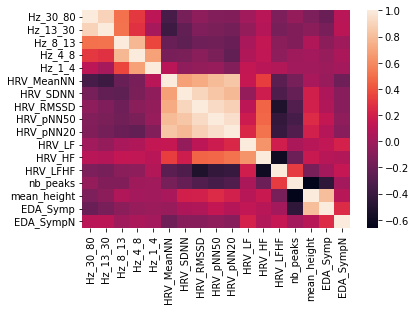

In [10]:
sns.heatmap(all_metrics.corr('spearman'))

In [11]:
all_metrics.rcorr('spearman')

,Hz_30_80,Hz_13_30,Hz_8_13,Hz_4_8,Hz_1_4,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,HRV_pNN50,HRV_pNN20,HRV_LF,HRV_HF,HRV_LFHF,nb_peaks,mean_height,EDA_Symp,EDA_SympN
Hz_30_80,-,***,***,**,,***,,,,,,,,,,*,
Hz_13_30,0.895,-,***,**,,***,*,,,,,,,,,,
Hz_8_13,0.502,0.513,-,***,***,*,*,,,,,,,,,,
Hz_4_8,0.312,0.283,0.776,-,***,,,,,*,,,,,,,
Hz_1_4,0.109,0.021,0.36,0.684,-,,,,,,,,,,,,
HRV_MeanNN,-0.345,-0.393,-0.218,-0.153,0.096,-,***,***,***,***,,***,**,,,,*
HRV_SDNN,-0.16,-0.243,-0.254,-0.14,-0.058,0.681,-,***,***,***,,,***,*,*,,
HRV_RMSSD,-0.07,-0.128,-0.191,-0.086,-0.05,0.724,0.904,-,***,***,,***,***,***,*,,
HRV_pNN50,-0.11,-0.14,-0.186,-0.14,-0.036,0.787,0.833,0.923,-,***,,***,***,***,**,,
HRV_pNN20,-0.119,-0.164,-0.208,-0.241,-0.113,0.835,0.786,0.878,0.945,-,**,***,***,***,*,,


Cerveau : 
- Delta & Theta vs Alpha vs Beta & Gamma

Coeur : 
- Time : RMSSD & SDNN & pNN50 = same ?
- Freq : LFHF anticorr avec time ? 


Cross :
- Beta & Gamma varient à l'inverse de la variabilité cardiaque
- LFHF corr à nb_peaks eda qui sont à l'inverse de variabilité cardiaque
- Gamma & EDA_Symp anticorr


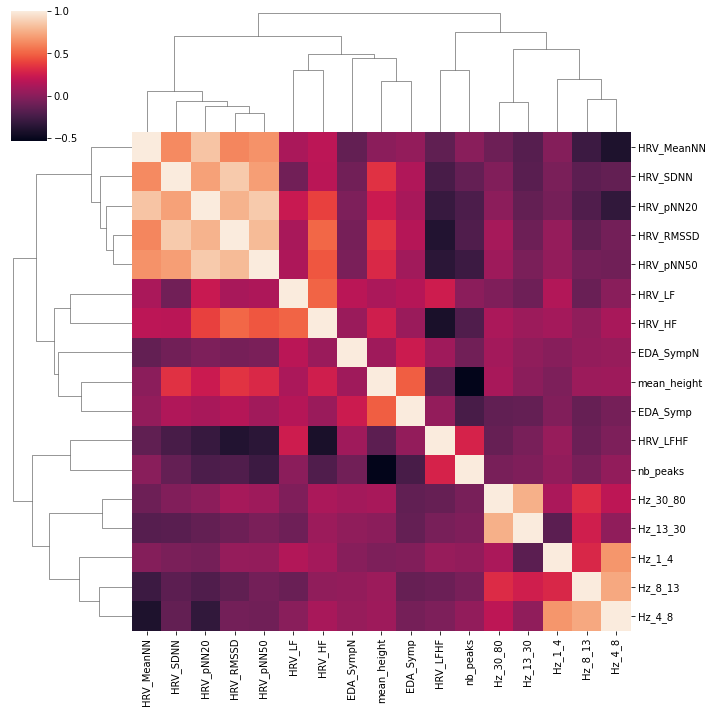

In [12]:
sns.clustermap(all_metrics.corr('pearson'))

In [13]:
df = load('eda')

In [14]:
df

,nb_peaks,mean_height,EDA_Symp,EDA_SympN,room,participant
0,5,8.160428,12.786035,0.029146,Baseline,P01PPILNI
1,15,2.953713,19.370624,0.042779,Take-off,P01PPILNI
2,10,4.843742,9.208438,0.006958,Savannah,P01PPILNI
3,12,9.037533,203.854123,0.026816,Canopy,P01PPILNI
4,19,2.661009,4.509376,0.005154,Bats,P01PPILNI
...,...,...,...,...,...,...
128,39,0.604003,1.419170,0.032142,Bats,P30BATDI
129,37,0.266921,0.031833,0.001094,Underground,P30BATDI
130,34,0.247044,0.192604,0.012143,Grassland,P30BATDI
131,12,1.821133,19.894255,0.007232,Sea,P30BATDI


In [15]:
df.groupby(predictor).mean()

,nb_peaks,mean_height,EDA_Symp,EDA_SympN
room,,,,
Baseline,19.333333,6.520646,29.762453,0.035197
Bats,20.066667,6.458506,48.699842,0.023724
Canopy,25.533333,5.077128,85.912180,0.034732
End of the world,17.692308,7.551634,26.893430,0.017128
Grassland,16.133333,6.708483,45.666071,0.011987
Savannah,21.600000,4.372189,42.512043,0.019377
Sea,20.933333,6.242554,63.151474,0.022279
Take-off,22.733333,4.237641,28.935844,0.020403
Underground,24.266667,6.063568,38.507713,0.019748


In [16]:
df.groupby(subject).mean()

,nb_peaks,mean_height,EDA_Symp,EDA_SympN
participant,,,,
P01PPILNI,10.444444,10.034970,63.438010,0.019662
P03PBABCO,20.625000,9.873267,224.376663,0.033349
P07GHOLE,27.333333,0.775145,1.646222,0.031585
P08AKKOR,54.222222,0.155471,0.061006,0.019052
P10LEVVA,9.222222,6.165537,40.708944,0.017447
P11KERSA,20.888889,3.071802,22.459509,0.013659
P12BOULI,31.000000,1.357625,4.377075,0.037487
P15LEPMA,15.333333,8.153394,41.210376,0.013811
P16MAUAD,7.333333,12.808345,115.553124,0.025987


In [17]:
ecg_metrics = load('ecg')

<AxesSubplot:xlabel='room'>

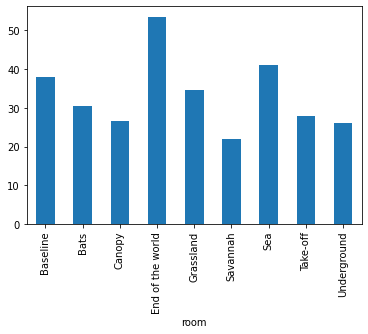

In [18]:
ecg_metrics.groupby('room').mean()['HRV_RMSSD'].plot.bar()

In [19]:
outcomes['ecg']

['HRV_MeanNN',
 'HRV_SDNN',
 'HRV_RMSSD',
 'HRV_pNN50',
 'HRV_pNN20',
 'HRV_LF',
 'HRV_HF',
 'HRV_LFHF']

In [20]:
ecg_metrics

,participant,room,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,HRV_pNN50,HRV_pNN20,HRV_LF,HRV_HF,HRV_LFHF
0,P01PPILNI,Baseline,781.649123,69.177338,41.982719,19.298246,54.385965,0.009352,0.008143,1.148484
1,P01PPILNI,Take-off,674.333333,66.195254,37.107642,6.060606,20.454545,0.004123,0.001830,2.252854
2,P01PPILNI,Savannah,719.548387,55.646292,27.522053,3.225806,20.161290,0.006109,0.001410,4.330836
3,P01PPILNI,Canopy,724.422764,49.675176,16.678247,0.813008,17.886179,0.048023,0.002688,17.866844
4,P01PPILNI,Bats,693.093750,40.800540,13.580904,0.000000,9.375000,0.011130,0.002218,5.018503
...,...,...,...,...,...,...,...,...,...,...
128,P30BATDI,Bats,744.235294,54.984236,19.592458,2.521008,23.529412,0.038689,0.001034,37.406946
129,P30BATDI,Underground,900.000000,42.688998,22.274760,1.020408,34.693878,0.032671,0.013650,2.393536
130,P30BATDI,Grassland,867.844660,59.366386,24.526896,3.883495,36.893204,0.015564,0.001905,8.169747
131,P30BATDI,Sea,762.172414,47.476544,23.273048,4.310345,31.896552,0.035776,0.004001,8.942277


Text(0.5, 1.0, 'Effect of room on HRV_RMSSD : **** \n N = 13 * 9 \n friedman : p-0.0')

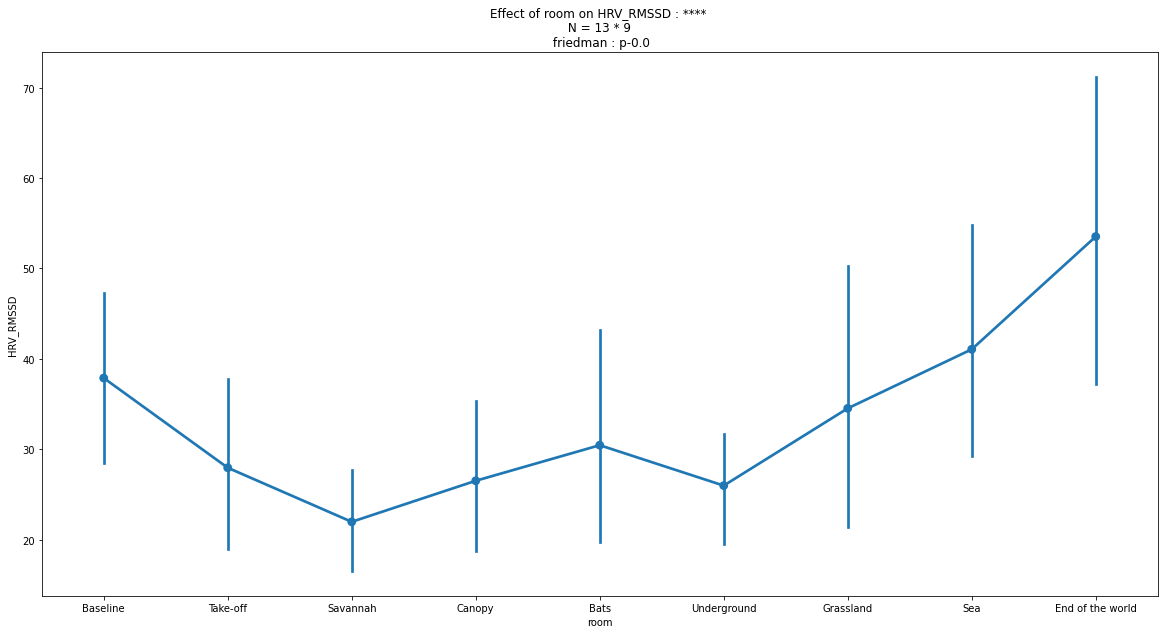

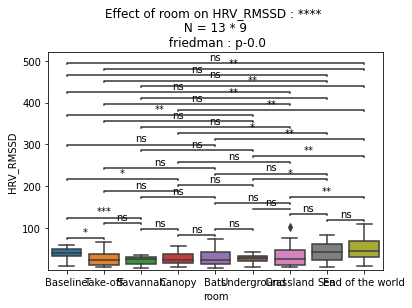

In [21]:
fig, ax = plt.subplots(figsize = (20,10))
sns.pointplot(data=ecg_metrics, x='room',y='HRV_RMSSD', ax=ax)
title = gh.auto_stats(df=ecg_metrics, predictor = 'room', outcome = 'HRV_RMSSD', subject = 'participant', transform = False).get_title()
ax.set_title(title)
# plt.savefig('../figures/pointplot_rmssd')

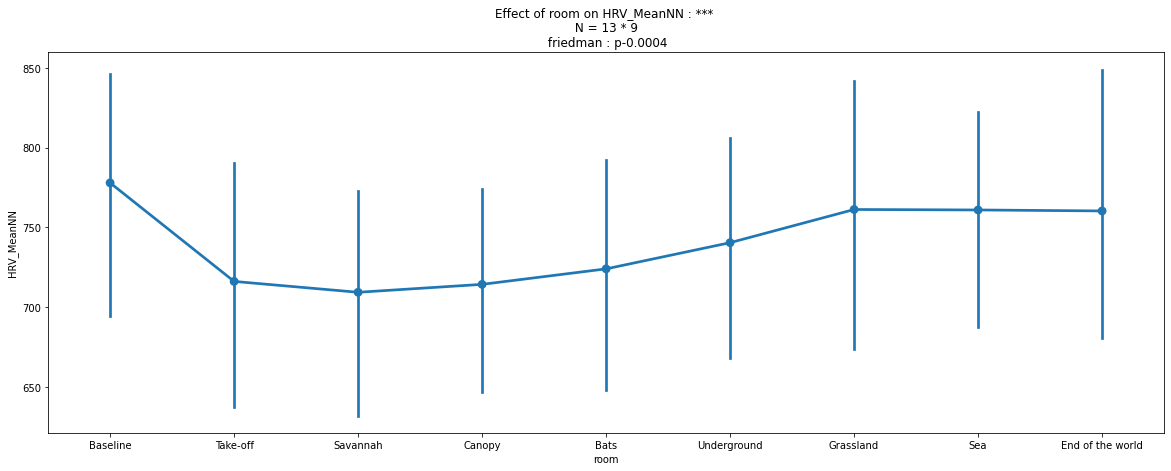

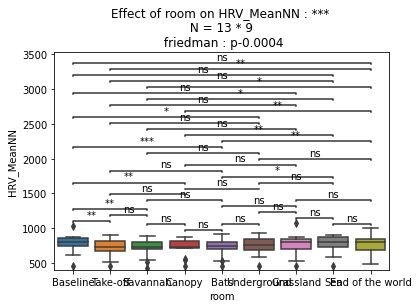

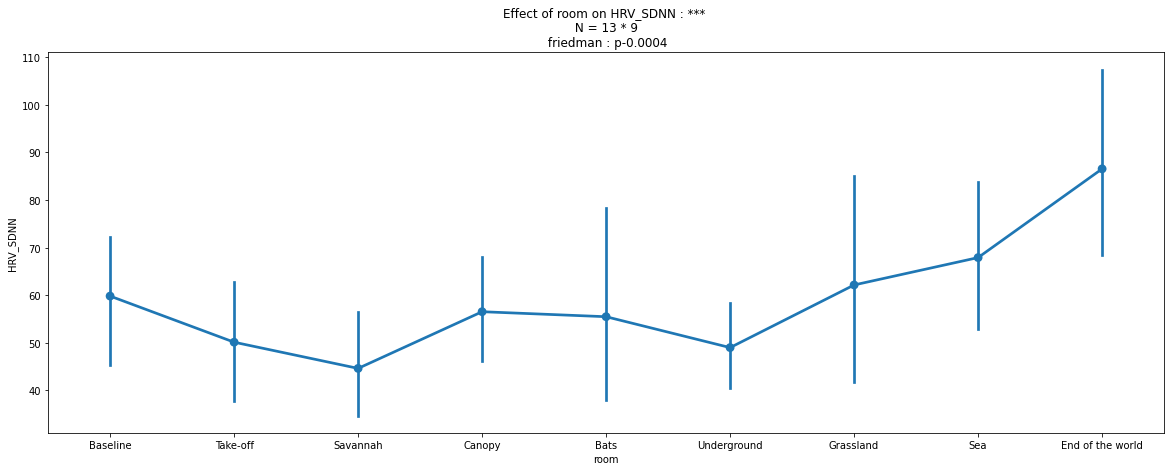

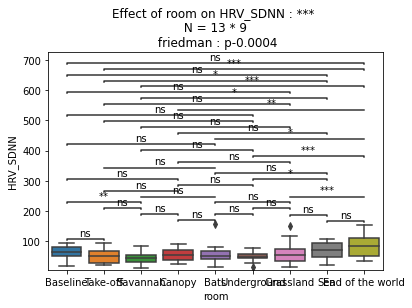

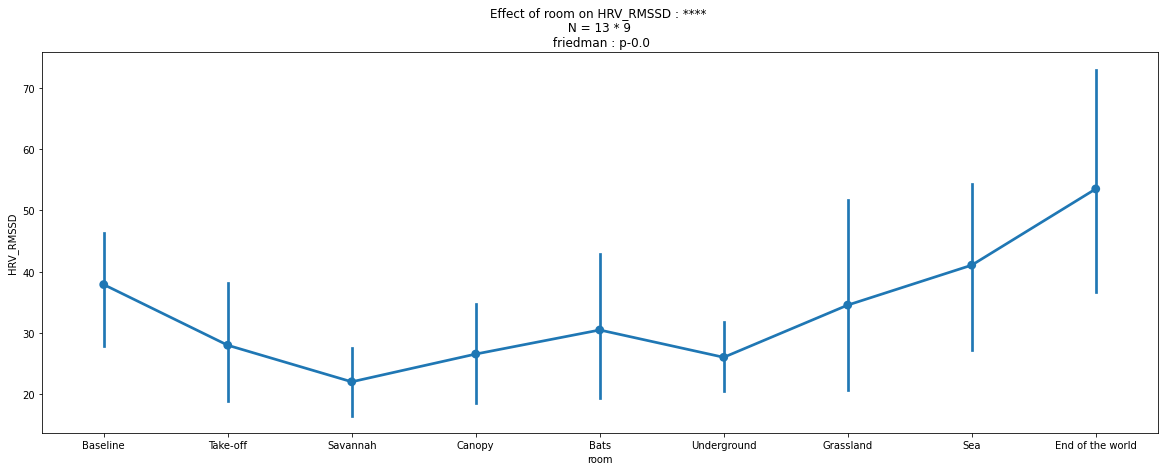

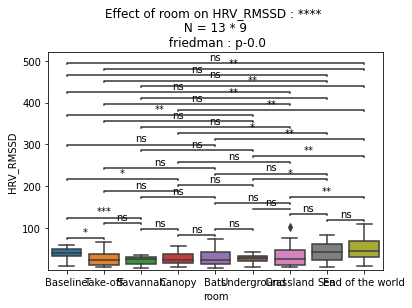

/home/valentin.ghibaudo/.virtualenvs/py38_cluster/lib64/python3.8/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/valentin.ghibaudo/.virtualenvs/py38_cluster/lib64/python3.8/site-packages/scipy/stats/morestats.py:3155: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
/home/valentin.ghibaudo/.virtualenvs/py38_cluster/lib64/python3.8/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/valentin.ghibaudo/.virtualenvs/py38_cluster/lib64/python3.8/site-packages/scipy/stats/morestats.py:3155: UserWarning: Sample size too small for normal approximation.
  warning

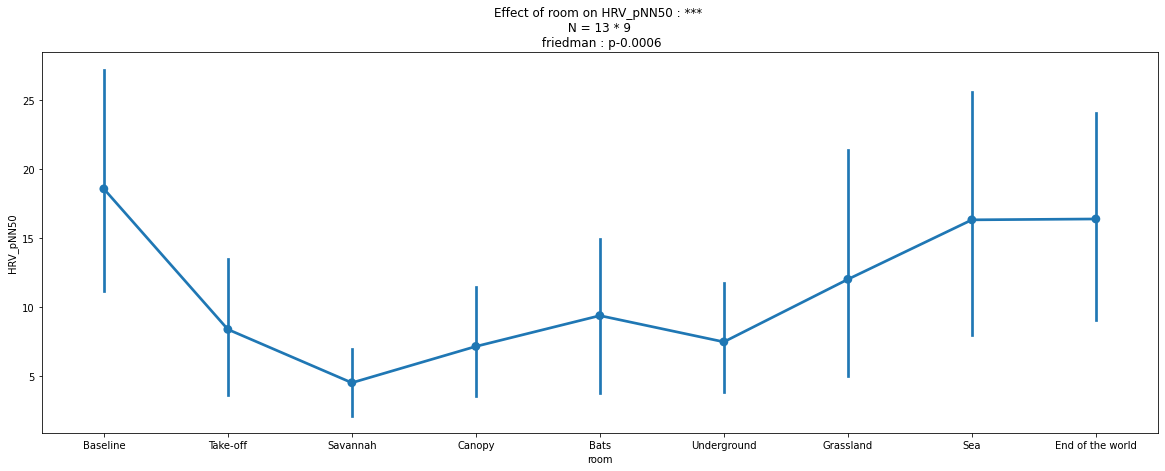

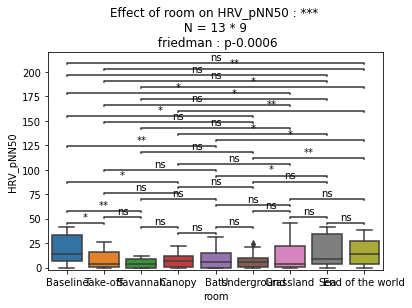

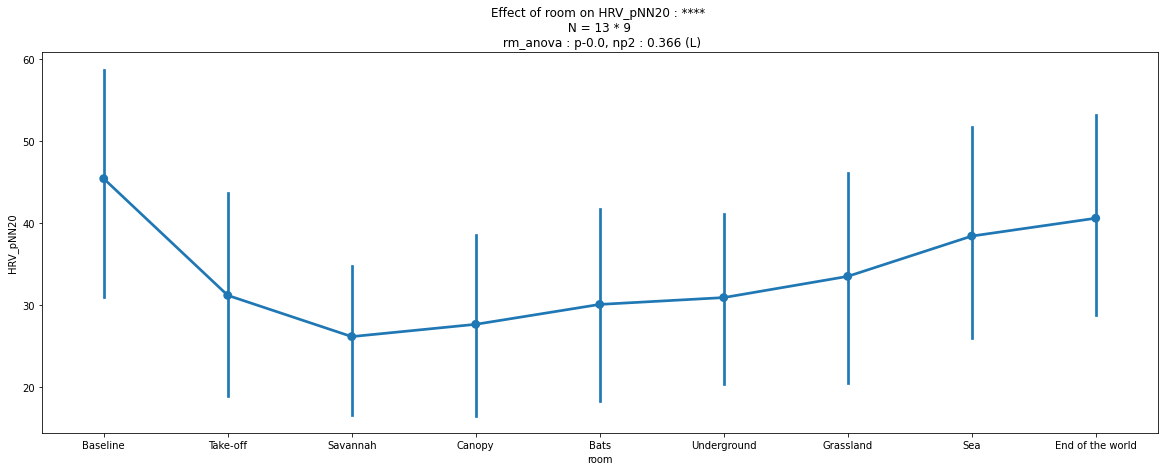

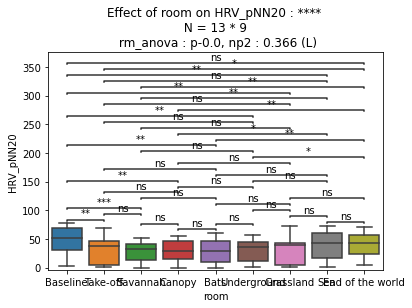

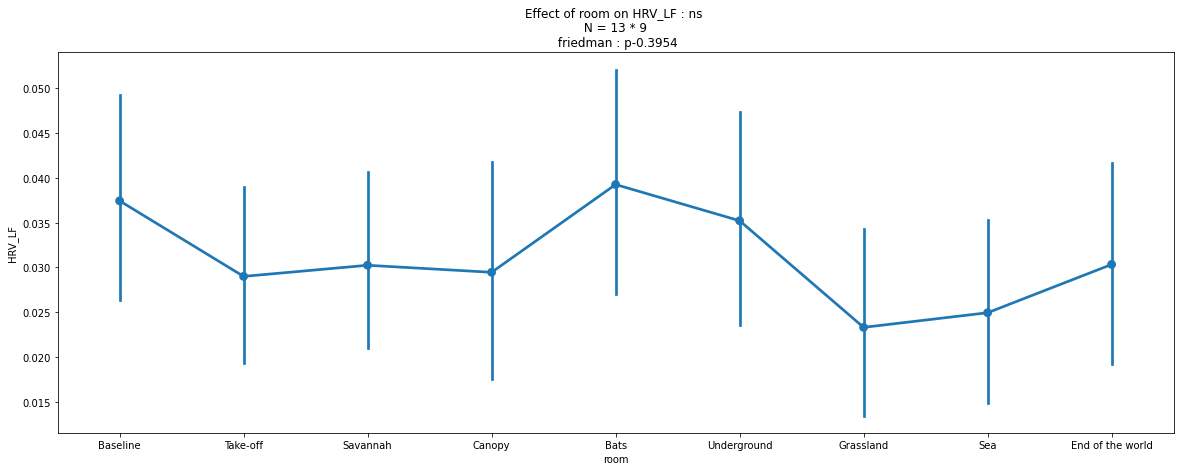

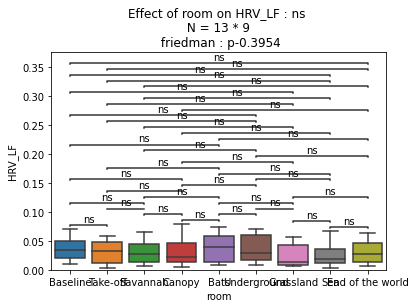

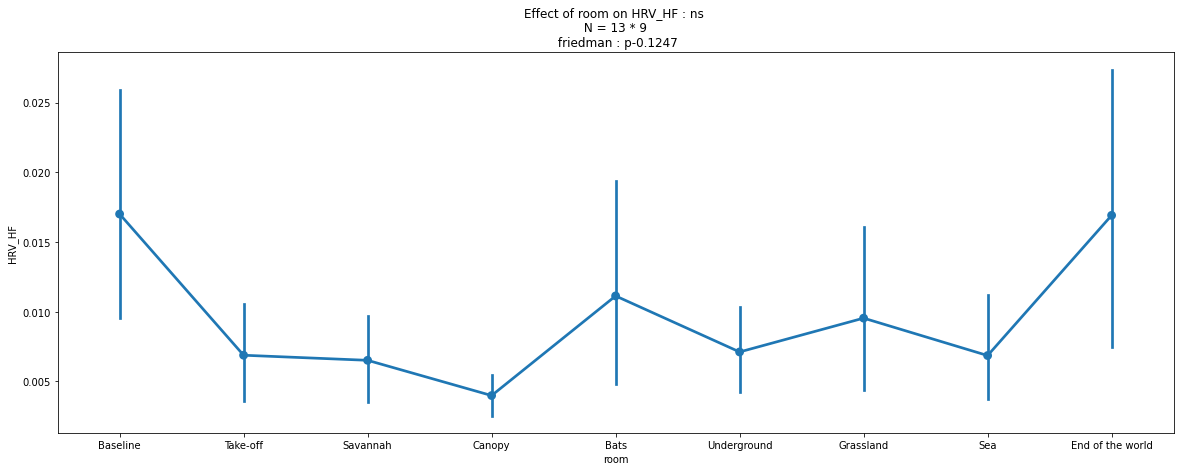

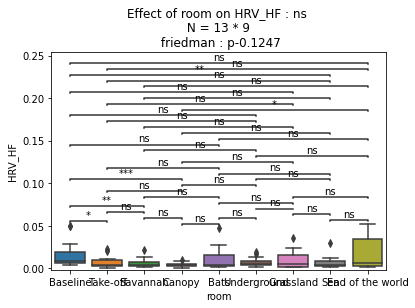

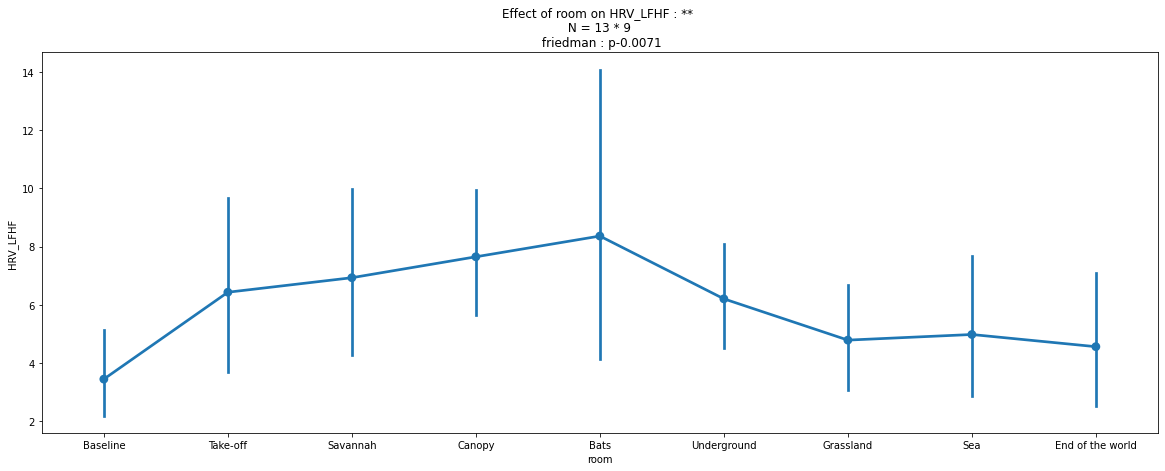

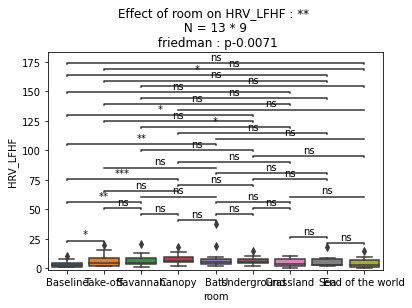

In [22]:
for outcome in outcomes['ecg']:
    fig, ax = plt.subplots(figsize = (20,7))
    title = gh.auto_stats(df=ecg_metrics, predictor = 'room', outcome = outcome, subject = 'participant', transform = False).get_title()
    sns.pointplot(x="room", y=outcome, data=ecg_metrics, ax=ax)
    ax.set_title(title)
    plt.show()

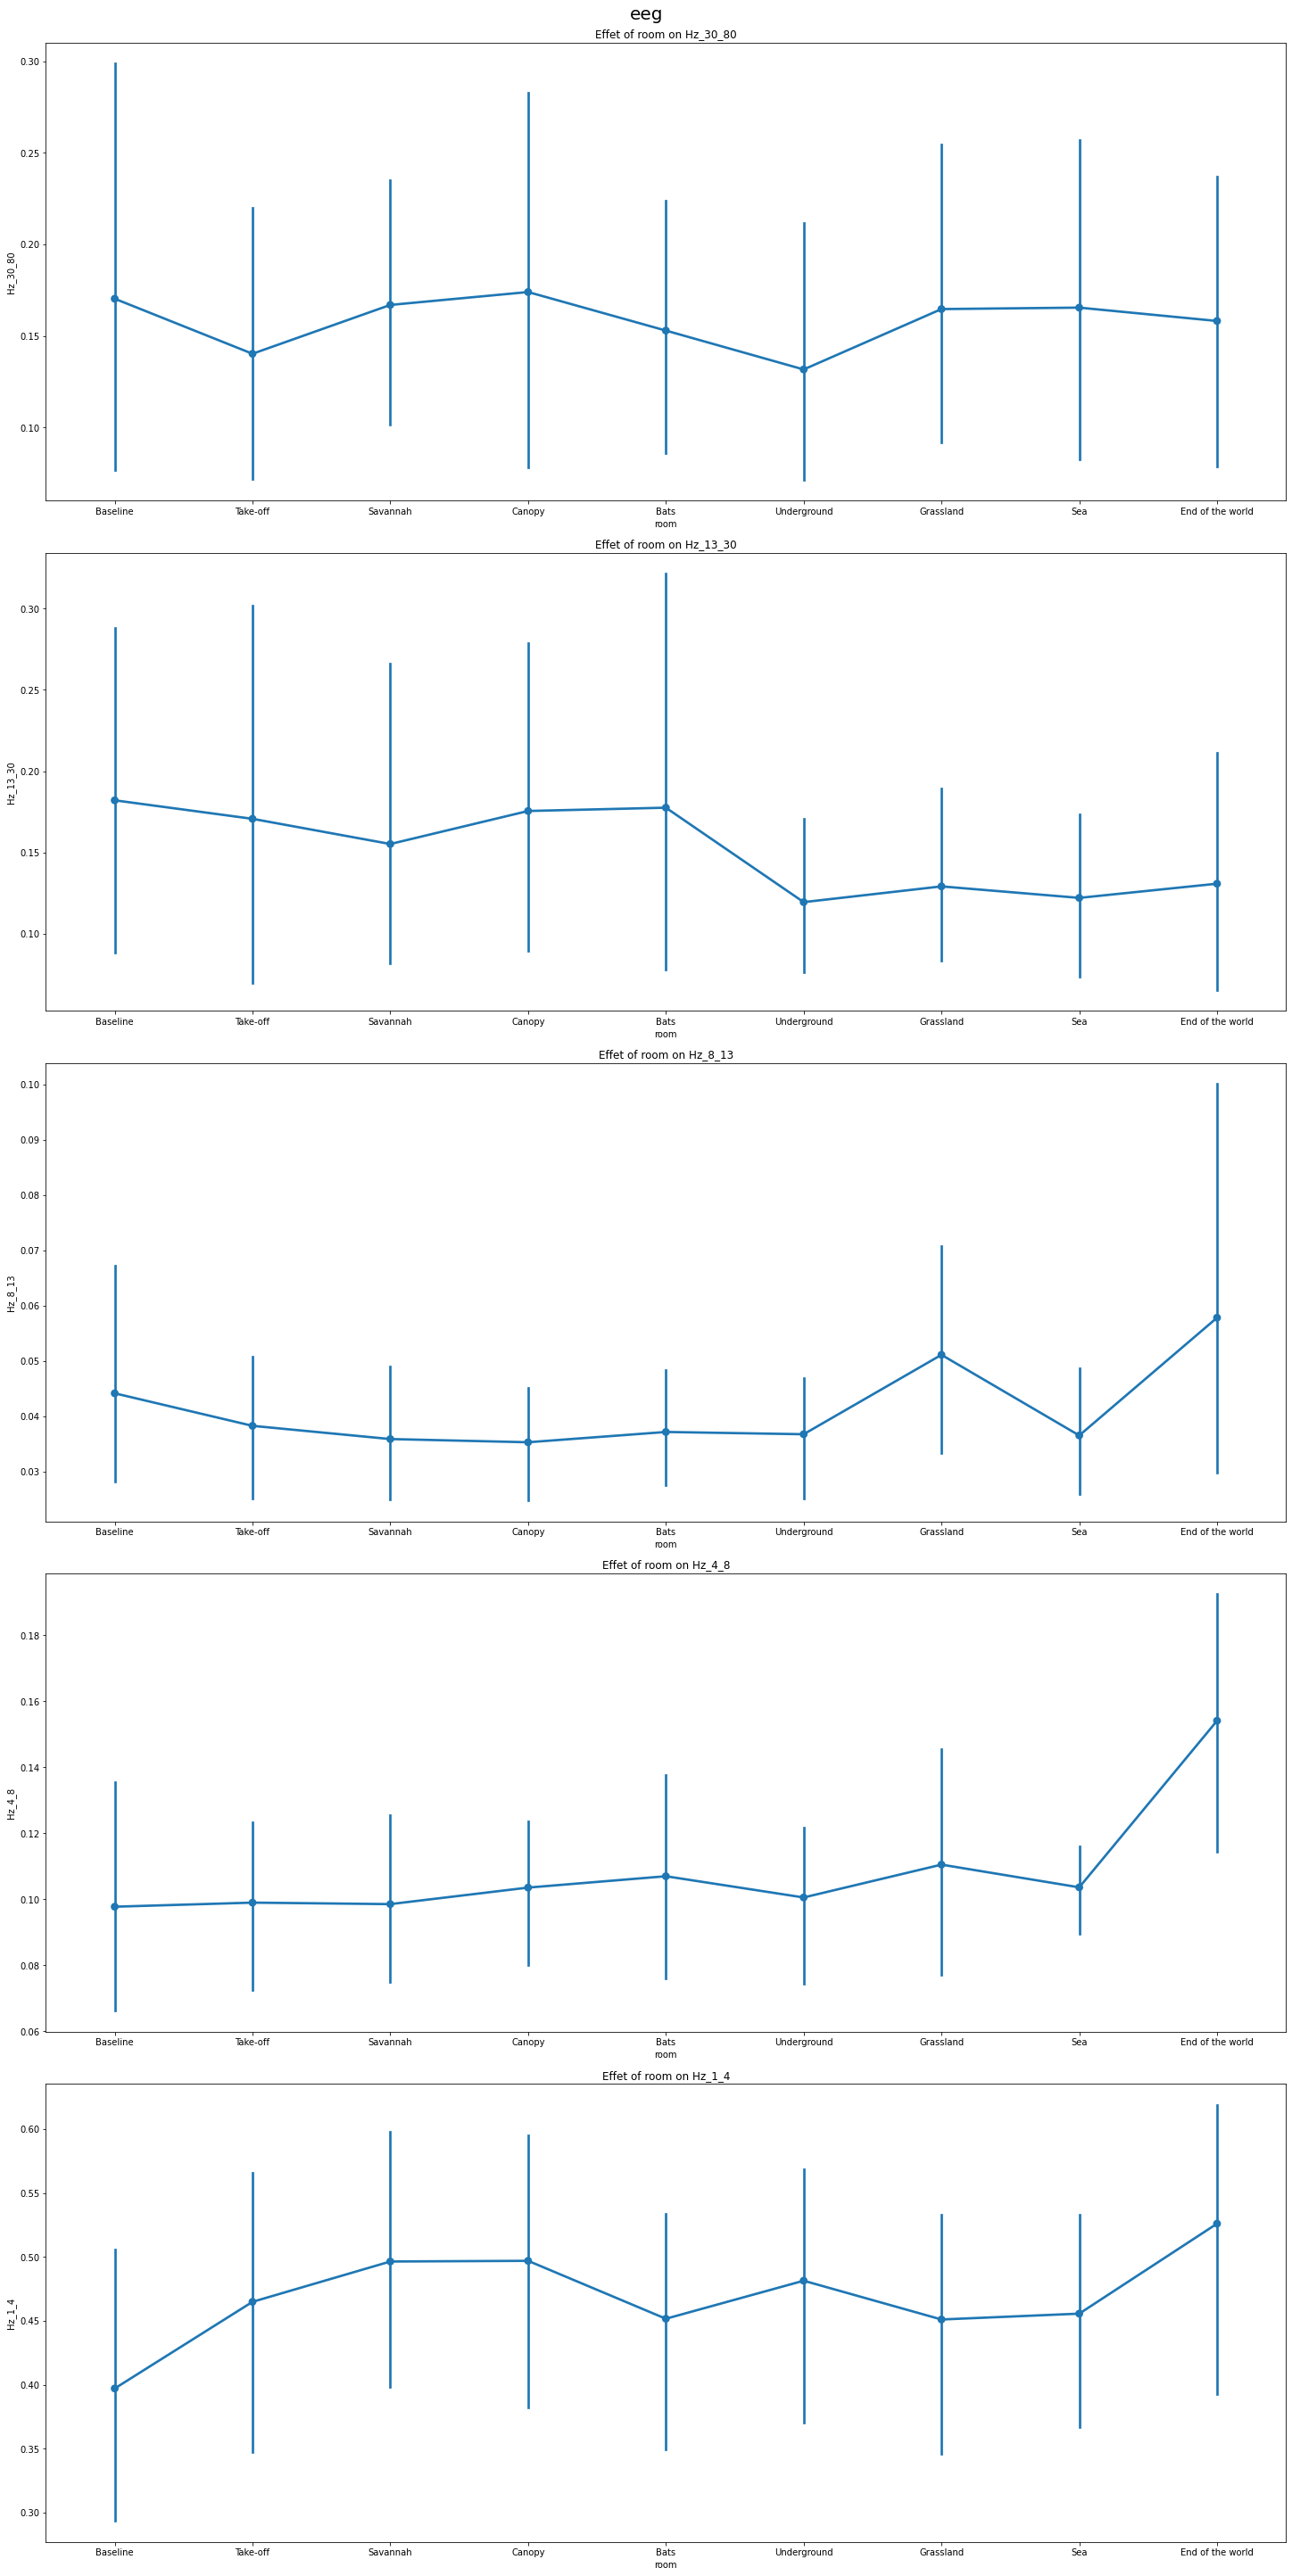

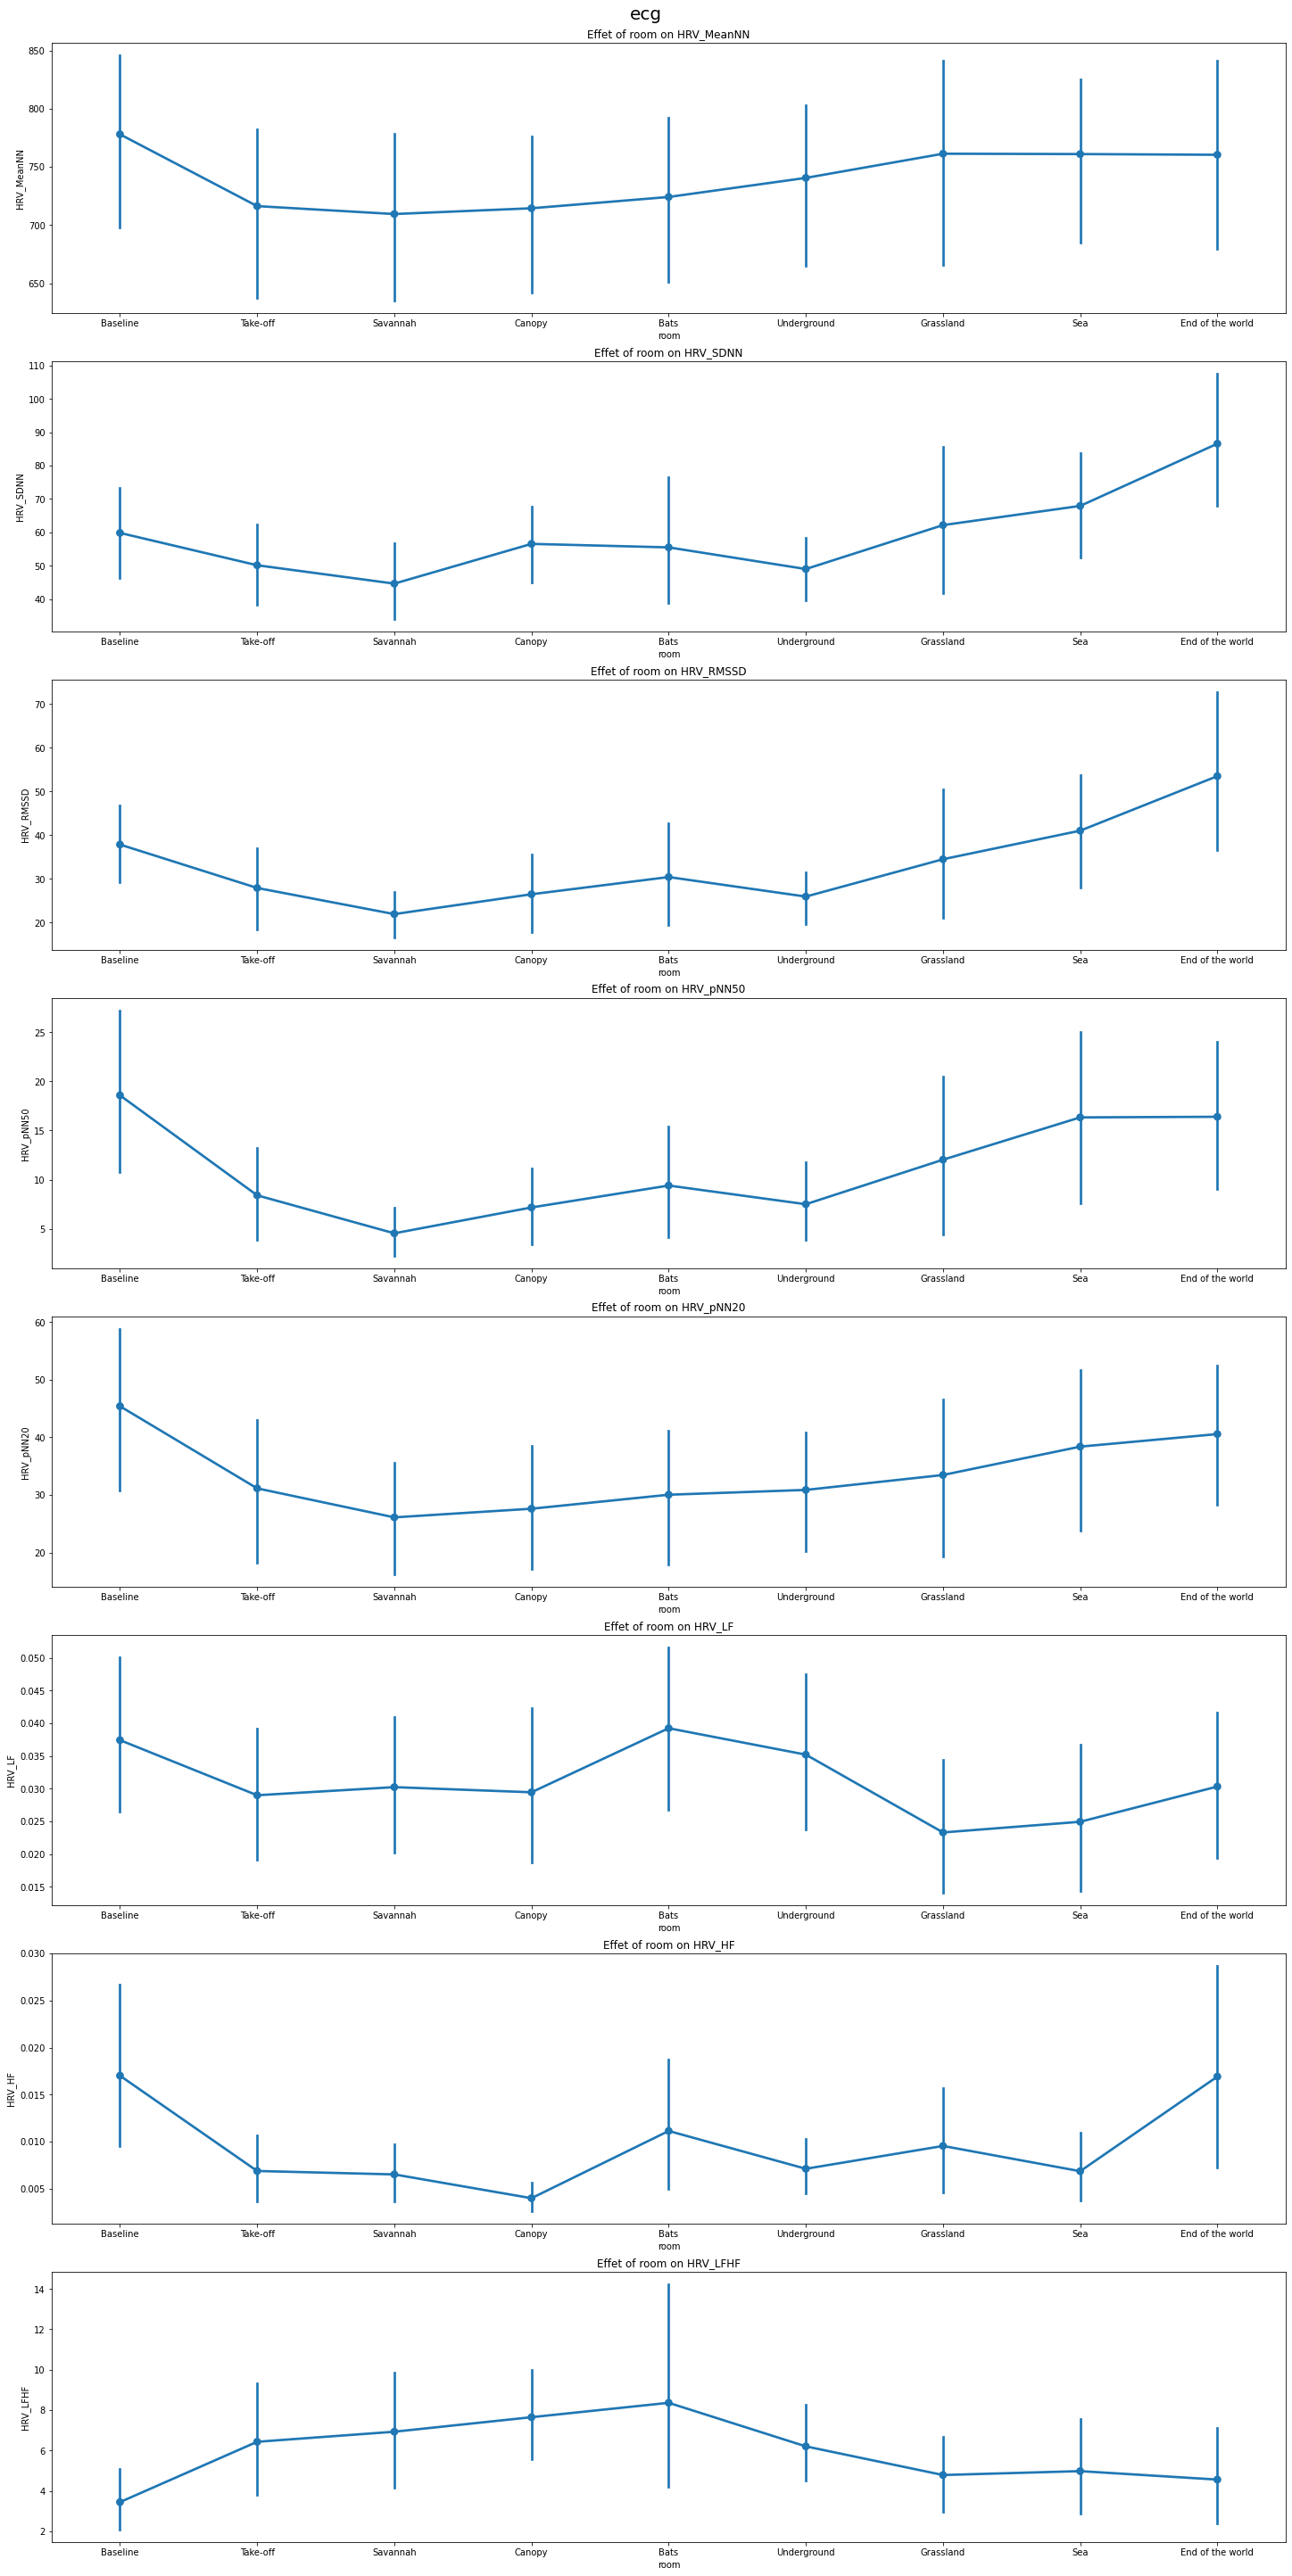

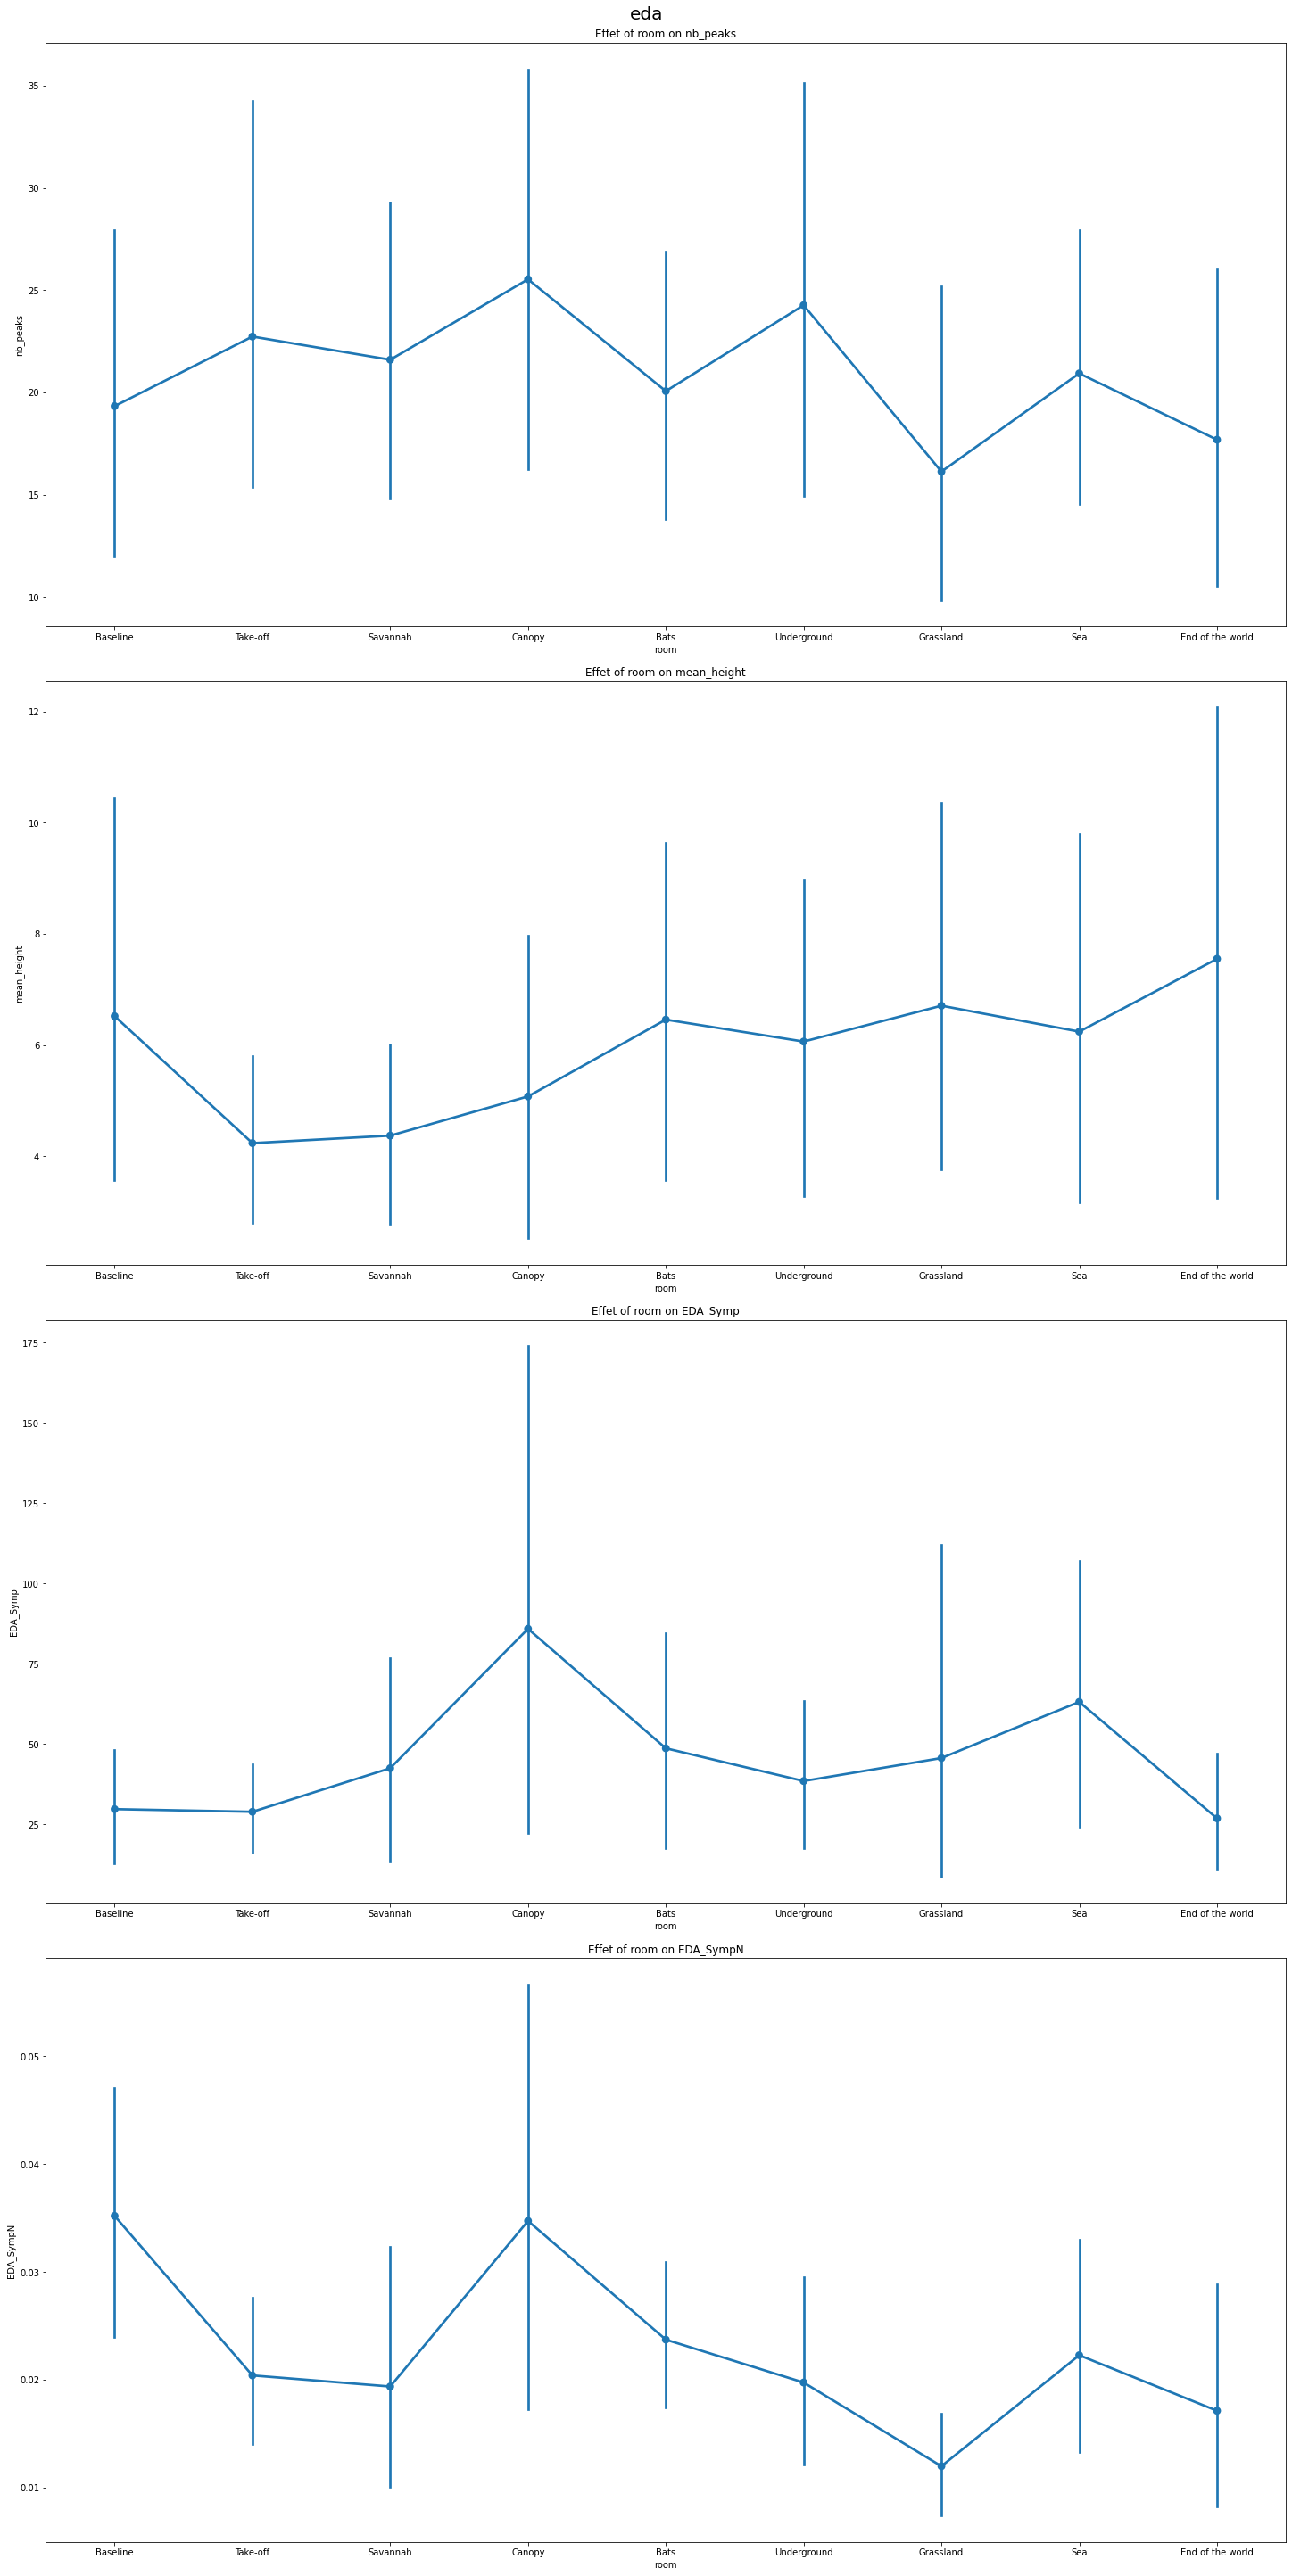

In [23]:
for dtype in ['eeg','ecg','eda']:
    df = load(dtype)
    loop_outcomes = outcomes[dtype]
    fig, axs = plt.subplots(nrows = len(loop_outcomes), figsize = (20,40), constrained_layout = True)
    fig.suptitle(f'{dtype}', fontsize = 20)
    for row, outcome in enumerate(loop_outcomes):
        ax = axs[row]
        sns.pointplot(data=df , x=predictor , y = outcome, ax = ax)
        ax.set_title(f'Effet of {predictor} on {outcome}')
    if savefig:
        plt.savefig(f'../stats/figs/boxplot_{dtype}')
    plt.show()

- Globalement les participants semblent quitter la visite dans le même état physiologique que dans lequel ils sont rentrés, notamment car end of the world rattrape les effets de bats et underground qui ont stressés nos participants

In [29]:
hrv = load('ecg')

In [38]:
hrv_bis = hrv[hrv['room'].isin(['Baseline','End of the world'])]

In [39]:
hrv.columns

Index(['participant', 'room', 'HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD',
       'HRV_pNN50', 'HRV_pNN20', 'HRV_LF', 'HRV_HF', 'HRV_LFHF'],
      dtype='object')

In [40]:
hrv_bis

,participant,room,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,HRV_pNN50,HRV_pNN20,HRV_LF,HRV_HF,HRV_LFHF
0,P01PPILNI,Baseline,781.649123,69.177338,41.982719,19.298246,54.385965,0.009352,0.008143,1.148484
8,P01PPILNI,End of the world,824.925926,105.369284,46.724486,14.814815,45.370370,0.007232,0.001689,4.281961
9,P03PBABCO,Baseline,745.033333,65.567969,33.540644,11.666667,42.500000,0.070607,0.006842,10.320294
17,P07GHOLE,Baseline,807.636364,67.972030,57.511706,33.636364,69.090909,0.028157,0.028658,0.982501
25,P07GHOLE,End of the world,715.387097,49.061552,26.085538,4.838710,41.129032,0.043732,0.007292,5.997374
26,P08AKKOR,Baseline,789.345133,57.132954,37.709415,7.079646,30.088496,0.020316,0.004950,4.104325
34,P08AKKOR,End of the world,785.380531,78.397831,38.794329,13.274336,37.168142,0.053528,0.005564,9.620584
35,P10LEVVA,Baseline,852.807692,90.803327,52.434332,22.115385,54.807692,0.033242,0.007959,4.176411
43,P10LEVVA,End of the world,895.515152,154.333614,94.006513,29.292929,61.616162,0.018279,0.010427,1.753120
44,P11KERSA,Baseline,843.047619,93.599020,34.469608,11.428571,52.380952,0.013395,0.003345,4.004879


In [41]:
gh.classify_df(hrv_bis, features = ['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD'], target = 'room')

0.64

In [ ]:
hrv.set_index(['participant','room']).mean(axis = 1).reset_index().drop(columns = 'room').set_index('participant').groupby('participant').mean()

In [ ]:
hrv.groupby('participant').mean().mean(axis = 1).plot.bar()

In [ ]:
load('eeg').groupby('participant').mean().mean(axis = 1).plot.bar()

In [ ]:
load('eda').groupby('participant').mean().mean(axis = 1).plot.bar()